<a href="https://colab.research.google.com/github/justkittenaround/DeepProteins/blob/master/ExtractCSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv # import the csv module for reading and extracting data from the desired csv file

from google.colab import drive # mount drive
drive.mount('/content/gdrive')

import os, sys # for navigating through directories

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


ValueError: ignored

In [0]:
os.chdir('gdrive/My Drive/DeepOrphan/LigandReceptorDatabase') #navigate to where the database file is

In [0]:
inputfile = csv.reader(open('interactions.csv','r')) # display more neatly

firstline = True
#i = 0
kws = [] # initialize an array to save all the target uniprot id's
for row in inputfile:
    if firstline:    #skip first line
        firstline = False
        continue #skip the first loop
    #print(row[3])
    kws.append(row[3]) # keep adding the id's to tge array
    #i += 1
    #print('\n')

In [0]:
print(kws)

['P18054', 'P16050', 'P16050', 'O15296', 'O15530', 'O15530', 'O15530', 'O15530', 'O15530', 'O15530', 'O15530', 'Q07011', 'Q07011', 'Q07011', 'P80404', 'P80404', 'P80404', 'P08195', '', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P19327', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P08908', 'P193

In [0]:
len(kws)

18557

In [0]:
try:
  import tflearn
except ImportError:
  !pip3 install -q tflearn
  import tflearn

In [0]:
try:
  import progressbar
except ImportError:
  !pip3 install -q progressbar2
  from progressbar import ProgressBar

In [0]:
 get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
from urllib.request import Request, urlopen
import numpy as np
from skimage.util import view_as_windows as vaw
import tensorflow as tf
import os, sys
import glob
from tflearn.data_utils import to_categorical, pad_sequences
from tflearn.layers.recurrent import lstm
from tflearn.layers.core import fully_connected

In [0]:
def get_uniprot_data(kws, numxs):
    '''Goes to the uniprot website and searches for 
       data with the keyword given. Returns the data 
       found up to limit elements.'''
    
    Protein_data = {} #to store the downloaded sequences from uniprot
    
            
    for i in range(numxs):
        kw = kws[i]
        #https://www.uniprot.org/uniprot/P18054.fasta
        url1 = 'https://www.uniprot.org/uniprot/'
        url2 = '.fasta'
        query_complete = url1 + kw + url2 #get the url
        request = Request(query_complete) # request connection
        response = urlopen(request) #open connection after request granted
        data = response.read() #read the data
        data = str(data, 'utf-8') #read the data in the utf-8 format
        data = data.split('\n') #seperate the collected data by '\n'
        data = data[1:-1]
        Protein_data[str(i)] = list(map(lambda x:x.lower(),data))

    #x = Protein_data['0'] + Protein_data['1']
    x = Protein_data
    #y = np.zeros([len(x), ])
    #y[:len(x)//2] = 1.
        
    #return x, y
    return x

In [0]:
string_len = 15 # how many amino acids to take for each substring
uniprot_limit = 15 # how many proteins to get for each class from uniprot
# how many amino acids to skip during cutting when moving to next cut.
# if this number is 1, it just moves to the next one.
stride = 1 #'''Defines parameters for looking at the protein'''

In [0]:
# call the get_uniprot_data function to get data and labels
#X, Y = get_uniprot_data(kws, uniprot_limit)
X = get_uniprot_data(kws, uniprot_limit)

In [0]:
print(X)

{'0': ['mgryrirvatgawlfsgsynrvqlwlvgtrgeaelelqlrpargeeeefdhdvaedlgll', 'qfvrlrkhhwlvddawfcdritvqgpgacaevafpcyrwvqgedilslpegtarlpgdna', 'ldmfqkhrekelkdrqqiycwatwkeglpltiaadrkddlppnmrfheekrldfewtlka', 'galemalkrvytllsswncledfdqifwgqksalaekvrqcwqddelfsyqflnganpml', 'lrrstslpsrlvlpsgmeelqaqlekelqngslfeadfilldgipanvirgekqylaapl', 'vmlkmepngklqpmviqiqppnpssptptlflpsdpplawllakswvrnsdfqlheiqyh', 'llnthlvaeviavatmrclpglhpifkfliphirytmeintrartqlisdggifdkavst', 'gggghvqllrraaaqltycslcppddladrgllglpgalyahdalrlweiiaryvegivh', 'lfyqrddivkgdpelqawcreitevglcqaqdrgfpvsfqsqsqlchfltmcvftctaqh', 'aainqgqldwyawvpnapctmrmpppttkedvtmatvmgslpdvrqaclqmaiswhlsrr', 'qpdmvplghhkekyfsgpkpkavlnqfrtdleklekeitarneqldwpyeylkpsciens', 'vti'], '1': ['mglyrirvstgaslyagsnnqvqlwlvgqhgeaalgkrlwpargketelkvevpeylgpl', 'lfvklrkrhllkddawfcnwisvqgpgagdevrfpcyrwvegngvlslpegtgrtvgedp', 'qglfqkhreeeleerrklyrwgnwkdglilnmagaklydlpvderfledkrvdfevslak', 'gladlaikdslnvltcwkdlddfnrifwcgqsklaervrdswkedalfgyqflnganpvv', 'lrrsahlparlvfppgme

In [0]:
x.shape

NameError: ignored

In [0]:
# d,target_gene_symbol,target_uniprot,target_ensembl_gene_id,target_ligand,inputfile = open('interactions.csv','r') # just checking what's in the csv file

# for row in inputfile:
#     print(row)

In [0]:
#inputfile = csv.reader(open('interactions.csv','r')) # display more neatly

#for row in inputfile:
    #print(row)

In [0]:
#inputfile = csv.reader(open('interactions.csv','r')) # display more neatly
# inputfile.readline()
#for row in inputfile:
    #print(row[0])

In [0]:
#inputfile = csv.reader(open('interactions.csv','r')) # display more neatly
#for column in inputfile:
#     print(column[0])
    #print(column[1])
#     print(column[12])
    #print(column[13])
    #print('\n')

In [0]:
# inputfile = csv.reader(open('interactions.csv','r')) # display more neatly
# for row in inputfile:
#     print(row[0])

In [0]:
#inputfile = csv.reader(open('interactions.csv','r'))
#next(inputfile) # now this skips the 1st row of the excel sheet
#for line in inputfile:
      #print(line[0])


# with csv.reader(open('interactions.csv','r')) as f:
#     next(f)
#     for line in f:
#       print(line)

# with open('interactions.csv', 'r') as f:
#     next(f)
#     for line in f:
#       print(line)
# with open('interactions.csv','r') as f:
#   lines = f.readlines()[1:]

In [0]:
#inputfile = csv.reader(open('interactions.csv','r')) # display more neatly

#firstline = True
#for row in inputfile:
    #if firstline:    #skip first line
        #firstline = False
        #continue
    #print(row[3])
    #print('\n')

# for row in inputfile:
# #     print(column[0])
#     print(row[3])
#     print('\n')

In [0]:
# def cut_strings(seqs, labels, length, padlen=None):
#     if padlen is None:
#         padlen = int(0.95 * length)

#     x = np.zeros([0, length, 1])
#     y = np.zeros([0, ])
#     count = 0
#     xlen = None
#     bar = progressbar.ProgressBar()

#     for seq in bar(seqs):
#         seq_nums = []
#         for letter in seq:
#             seq_nums.append(max(ord(letter)-97, 0))

#         if len(seq_nums) > length:
#             padded_seq = np.pad(np.asarray(seq_nums), (padlen, padlen),
#                                           'constant', constant_values=22.)
#             cut_seq = vaw(padded_seq, (length, ))
#             y = np.concatenate((y, np.ones([cut_seq.shape[0], ])*labels[count]))
#             x = np.concatenate((x, cut_seq[..., None]))
#             count += 1
#         else:
#             continue

#     print('Used {} proteins.'.format(count))
#     plt.hist(x[x != 22.].flatten(), bins=25)
#     plt.show()

#     return x, y

100% (24 of 24) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Used 22 proteins.


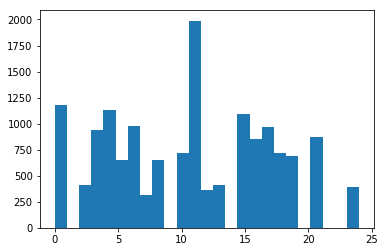

In [0]:
# X, Y = cut_strings(X, Y, string_len, stride)